In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Parameters
IMAGE_SIZE = 224  # EfficientNet input size
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [5]:
# Path to your dataset
dataset_path = "C:/Users/91890/OneDrive/Desktop/skin disease/All"

In [6]:
# Load data
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

Found 2357 files belonging to 9 classes.


In [7]:
# Split into train (80%), val (10%), test (10%)
total_batches = tf.data.experimental.cardinality(full_dataset).numpy()
train_size = int(0.8 * total_batches)
val_size = int(0.1 * total_batches)

train_ds = full_dataset.take(train_size)
val_ds = full_dataset.skip(train_size).take(val_size)
test_ds = full_dataset.skip(train_size + val_size)

In [8]:
# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

class_names = full_dataset.class_names
num_classes = len(class_names)

In [9]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    batch_size=32,          # You can tune this
    callbacks=[             # Optional: add early stopping, learning rate decay
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)
    ],
    verbose=1               # Show training progress
)

Epoch 1/30


c:\Users\91890\OneDrive\Desktop\skin disease\skincancer\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 657ms/step - accuracy: 0.2791 - loss: 2.9959 - val_accuracy: 0.3929 - val_loss: 1.6954 - learning_rate: 0.0010
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 45s 736ms/step - accuracy: 0.3914 - loss: 1.6763 - val_accuracy: 0.5714 - val_loss: 1.3521 - learning_rate: 0.0010
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4544 - loss: 1.5476 - val_accuracy: 0.5357 - val_loss: 1.4442 - learning_rate: 0.0010
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4730 - loss: 1.4799 - val_accuracy: 0.4598 - val_loss: 1.5087 - learning_rate: 0.0010
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5307 - loss: 1.3620 - val_accuracy: 0.5179 - val_loss: 1.4253 - learning_rate: 2.0000e-04
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 37s 618ms/step - accuracy: 0.5440 - loss: 1.2622 - val_accuracy: 0.5759 - val_loss: 1.2620 - learning_rate: 2.0000e-04
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 36s 612ms/step - accuracy: 0.5747 - loss: 1.2215 - val_a

In [10]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6449 - loss: 1.1555
Test Accuracy: 64.49%


In [11]:
#Train Model (With Callbacks)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=2, verbose=1),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=callbacks
)

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 46s 770ms/step - accuracy: 0.6615 - loss: 0.9850 - val_accuracy: 0.5804 - val_loss: 1.2565 - learning_rate: 1.6000e-06
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6615 - loss: 0.9756 - val_accuracy: 0.6250 - val_loss: 1.0836 - learning_rate: 1.6000e-06
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6658 - loss: 0.9747 - val_accuracy: 0.6205 - val_loss: 1.1379 - learning_rate: 1.6000e-06
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6601 - loss: 0.9846
Epoch 4: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
59/59 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6589 - loss: 0.9861 - val_accuracy: 0.5759 - val_loss: 1.1373 - learning_rate: 1.6000e-06
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6515 - loss: 0.9858 - val_accuracy: 0.6429 - val_loss: 1.0819 - learning_rate: 3.2000e-07
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6774 - loss: 0

In [12]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6041 - loss: 1.1619
Test Accuracy: 60.41%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_ds, class_names):
    y_true = []
    y_pred = []

    # Collect true and predicted labels
    for images, labels in test_ds:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=class_names,
                yticklabels=class_names)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


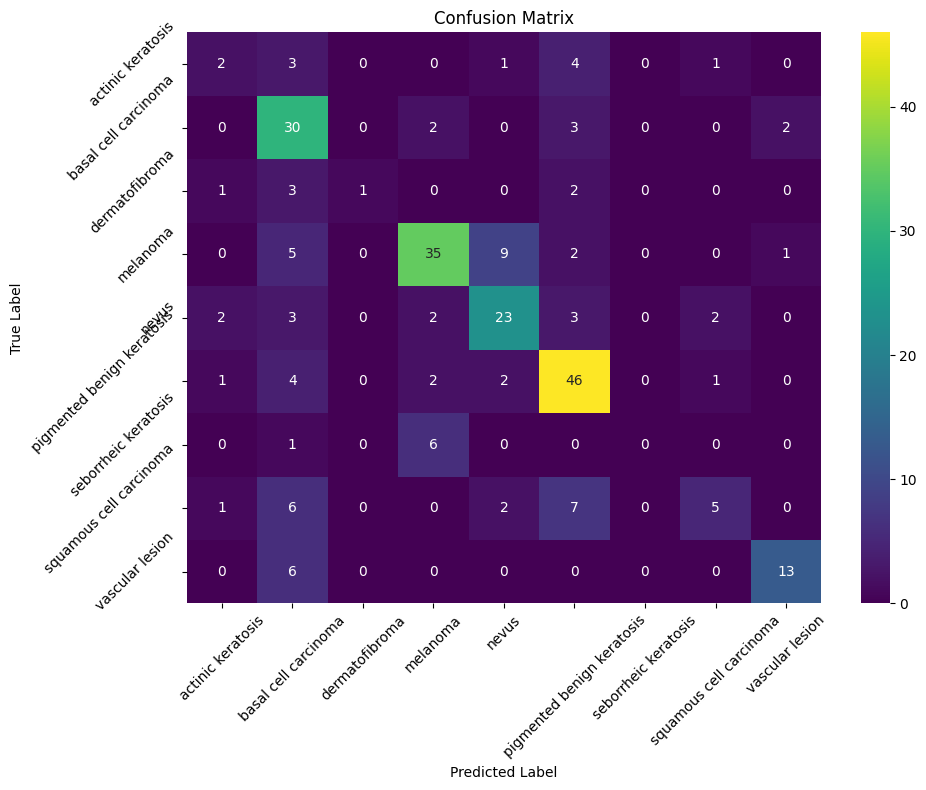

In [19]:
plot_confusion_matrix(model, test_ds, class_names)

In [20]:
import random

def predict_random_test_images(model, test_ds, class_names, num_images=6):
    # Convert test_ds to list of (image, label) batches
    all_images = []
    all_labels = []
    for images, labels in test_ds:
        all_images.extend(images)
        all_labels.extend(labels)

    # Select random indices
    indices = random.sample(range(len(all_images)), num_images)

    for i in indices:
        img = all_images[i]
        label = all_labels[i].numpy()

        # Predict
        prediction = model.predict(tf.expand_dims(img, axis=0), verbose=0)
        pred_class = np.argmax(prediction)
        confidence = np.max(prediction)

        # Plot
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"Actual: {class_names[label]}\nPredicted: {class_names[pred_class]} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()


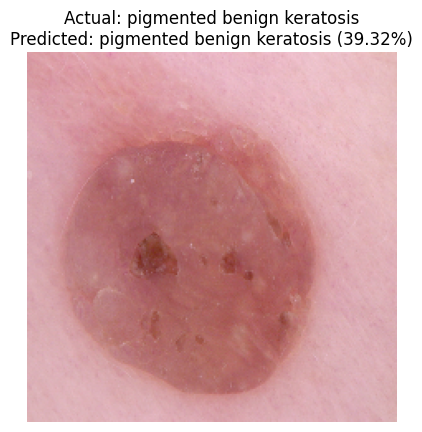

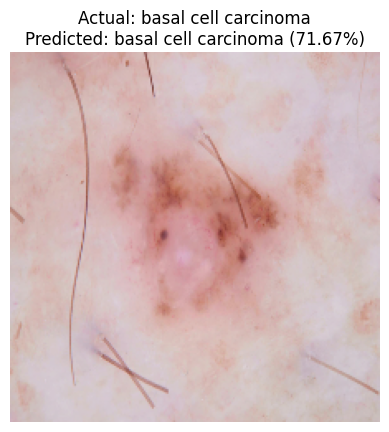

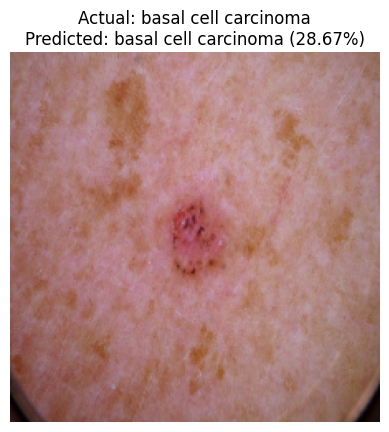

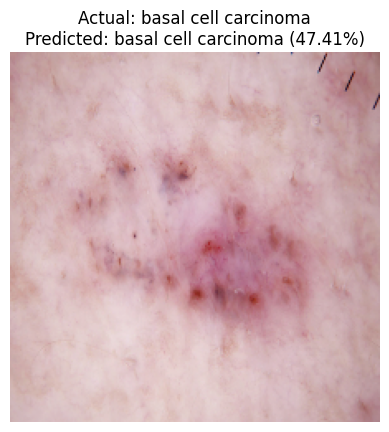

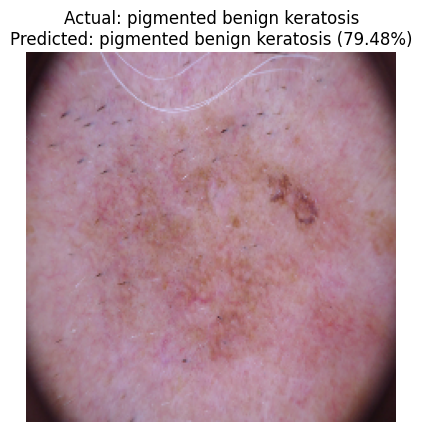

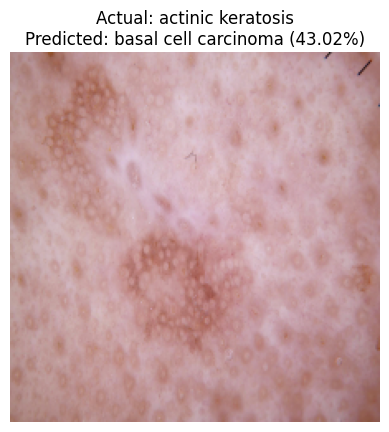

In [21]:
predict_random_test_images(model, test_ds, class_names)

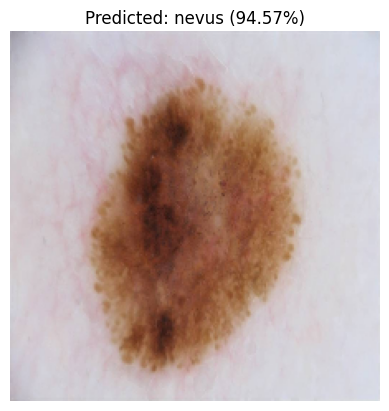

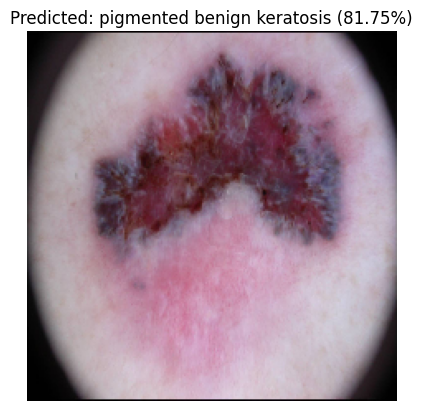

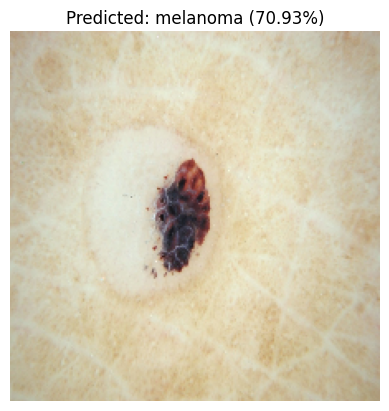

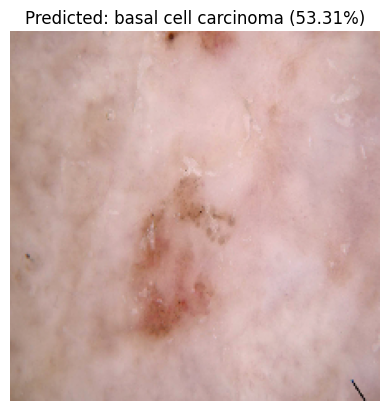

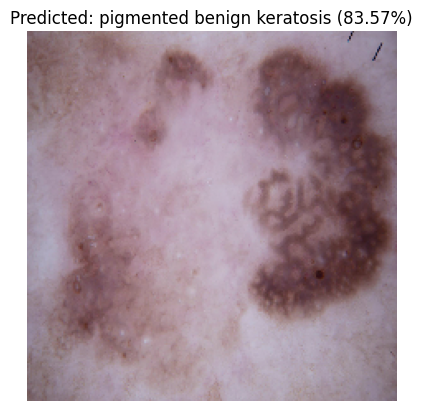

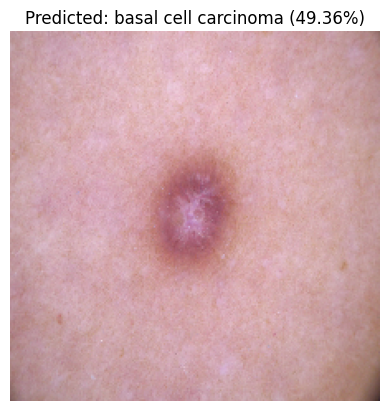

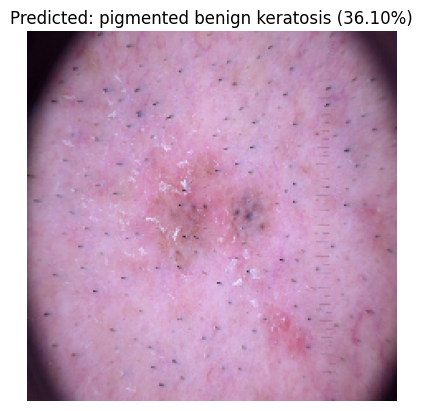

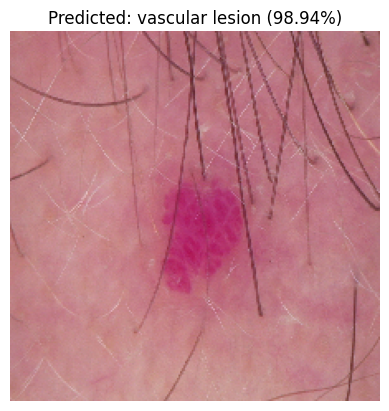

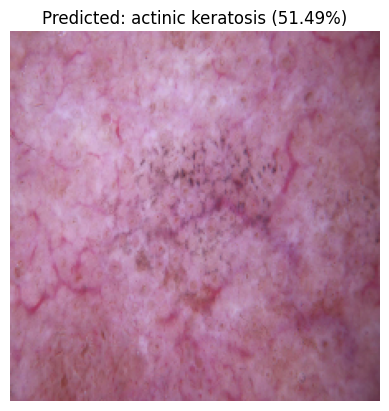

In [23]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_images_from_folder(model, folder_path, class_names, img_size=(224, 224)):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for file in image_files:
        img_path = os.path.join(folder_path, file)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_batch = np.expand_dims(img_array, axis=0)
        img_preprocessed = preprocess_input(img_batch)  # Match training preprocessing

        # Predict
        prediction = model.predict(img_preprocessed, verbose=0)
        pred_class = np.argmax(prediction)
        confidence = np.max(prediction)

        # Show image and prediction
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[pred_class]} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()


# Set the path to your unseen image folder
folder_path = "C:/Users/91890/OneDrive/Desktop/skin disease/prediction"

# Call the function
predict_images_from_folder(model, folder_path, class_names)